In [1]:
import yfinance as yf

In [2]:
symbols = ['AAPL', 'MSFT', 'NFLX', 'AMZN']

In [4]:
data = yf.download(symbols, start='2019-07-01', end='2020-07-01')
data['Close']

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MSFT,NFLX
Date,,,,
2019-07-01,50.387501,96.109497,135.679993,374.600006
2019-07-02,50.682499,96.715500,136.580002,375.429993
2019-07-03,51.102501,96.949997,137.460007,381.720001
2019-07-05,51.057499,97.145500,137.059998,380.549988
2019-07-08,50.005001,97.615997,136.960007,376.160004
...,...,...,...,...
2020-06-24,90.014999,136.720001,197.839996,457.850006
2020-06-25,91.209999,137.729004,200.339996,465.910004
2020-06-26,88.407501,134.643494,196.330002,443.399994


In [12]:
data = yf.download('AMZN',
                   start='2023-06-21',
                   end='2023-06-22',
                   interval='1m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-21 09:30:00-04:00,125.639999,125.830002,125.099998,125.320000,125.320000,1583889
2023-06-21 09:31:00-04:00,125.339996,125.930000,125.129997,125.930000,125.930000,272282
2023-06-21 09:32:00-04:00,125.849998,126.000000,125.620003,125.769997,125.769997,264621
2023-06-21 09:33:00-04:00,125.769997,125.860001,125.570000,125.709999,125.709999,275464
2023-06-21 09:34:00-04:00,125.709999,126.220001,125.680000,126.050003,126.050003,402611
...,...,...,...,...,...,...
2023-06-21 15:55:00-04:00,125.010002,125.010002,124.849998,124.930000,124.930000,235190
2023-06-21 15:56:00-04:00,124.919998,124.949997,124.779999,124.820000,124.820000,253193
2023-06-21 15:57:00-04:00,124.812500,124.870003,124.794998,124.800003,124.800003,187050


In [53]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize
plt.style.use('seaborn-v0_8')
np.set_printoptions(precision=5, suppress=True, formatter={'float': lambda x: f'{x:6.3f}'})

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GLD']

In [7]:
rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna()

<Axes: xlabel='Date'>

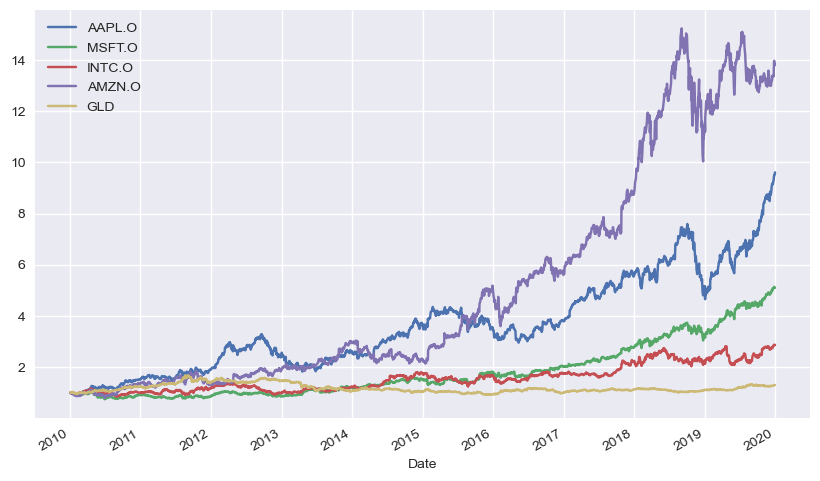

In [9]:
(raw[symbols] / raw[symbols].iloc[0]).plot(figsize=(10, 6))

In [10]:
weights = len(rets.columns) * [1 / len(rets.columns)]
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [11]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252

In [15]:
port_return(rets, weights)

0.15694764653018103

In [16]:
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252, weights)) ** 0.5

In [18]:
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GLD
Date,,,,,
2010-01-05,0.001727,0.000323,-0.000479,0.005883,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,0.004951
2010-01-11,-0.008861,-0.012802,0.005744,-0.024350,0.013202
...,...,...,...,...,...
2019-12-24,0.000950,-0.000191,0.003034,-0.002116,0.009388
2019-12-26,0.019646,0.008163,0.006877,0.043506,0.007827
2019-12-27,-0.000380,0.001826,0.004337,0.000551,-0.000351


In [20]:
rets.cov() * 252

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GLD
AAPL.O,0.066577,0.026723,0.027003,0.031711,0.000392
MSFT.O,0.026723,0.051737,0.031388,0.034180,-0.000869
INTC.O,0.027003,0.031388,0.060305,0.027341,-0.000724
AMZN.O,0.031711,0.034180,0.027341,0.095301,-0.001889
GLD,0.000392,-0.000869,-0.000724,-0.001889,0.024116


In [24]:
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [25]:
np.dot(rets.cov() * 252, weights)

array([ 0.030,  0.029,  0.029,  0.037,  0.004])

In [26]:
np.dot(weights, np.dot(rets.cov() * 252, weights)) ** 0.5

0.16106507848480675

In [27]:
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [28]:
port_sharpe(rets, weights)

0.9744362217225497

In [31]:
w = np.random.random((1000, len(symbols)))

In [38]:
w = (w.T / w.sum(axis=1)).T

In [39]:
w

array([[ 0.156,  0.246,  0.051,  0.387,  0.161],
       [ 0.342,  0.112,  0.296,  0.093,  0.156],
       [ 0.232,  0.111,  0.168,  0.308,  0.181],
       ...,
       [ 0.293,  0.204,  0.317,  0.161,  0.025],
       [ 0.318,  0.007,  0.088,  0.345,  0.243],
       [ 0.114,  0.203,  0.172,  0.249,  0.262]])

In [40]:
w[:5]

array([[ 0.156,  0.246,  0.051,  0.387,  0.161],
       [ 0.342,  0.112,  0.296,  0.093,  0.156],
       [ 0.232,  0.111,  0.168,  0.308,  0.181],
       [ 0.253,  0.109,  0.165,  0.236,  0.236],
       [ 0.089,  0.074,  0.422,  0.060,  0.356]])

In [41]:
pvr = [
    (port_volatility(rets[symbols], weights), port_return(rets[symbols], weights))
    for weights in w
]
pvr = np.array(pvr)
pvr

array([[ 0.185,  0.187],
       [ 0.170,  0.156],
       [ 0.173,  0.174],
       ...,
       [ 0.192,  0.176],
       [ 0.173,  0.180],
       [ 0.155,  0.149]])

In [42]:
psr = pvr[:, 1] / pvr[:, 0]
psr

array([ 1.011,  0.916,  1.008,  1.009,  0.703,  0.886,  0.980,  0.850,
        0.974,  0.951,  0.769,  0.872,  0.974,  0.990,  0.876,  0.980,
        0.912,  0.993,  0.887,  1.019,  0.909,  0.925,  0.969,  1.001,
        0.974,  0.860,  0.913,  0.917,  0.951,  0.887,  0.991,  0.831,
        1.019,  0.915,  0.709,  0.835,  1.051,  1.032,  1.003,  0.925,
        0.942,  0.942,  0.920,  1.053,  0.941,  0.988,  0.966,  0.902,
        1.021,  0.950,  0.818,  0.965,  0.828,  1.033,  0.857,  0.983,
        0.927,  0.985,  0.971,  1.048,  0.998,  0.932,  0.960,  0.945,
        0.989,  0.904,  0.997,  1.015,  0.984,  1.047,  0.919,  0.977,
        0.860,  0.735,  0.929,  0.981,  1.045,  1.021,  1.004,  0.930,
        0.770,  0.954,  0.912,  0.875,  0.883,  1.039,  0.955,  1.021,
        1.058,  0.941,  0.994,  0.929,  1.037,  0.934,  0.783,  0.854,
        1.041,  0.972,  0.909,  0.958,  0.910,  0.980,  0.917,  1.011,
        0.914,  0.947,  0.780,  0.875,  0.973,  0.721,  0.865,  0.900,
      

Text(0, 0.5, 'expected return')

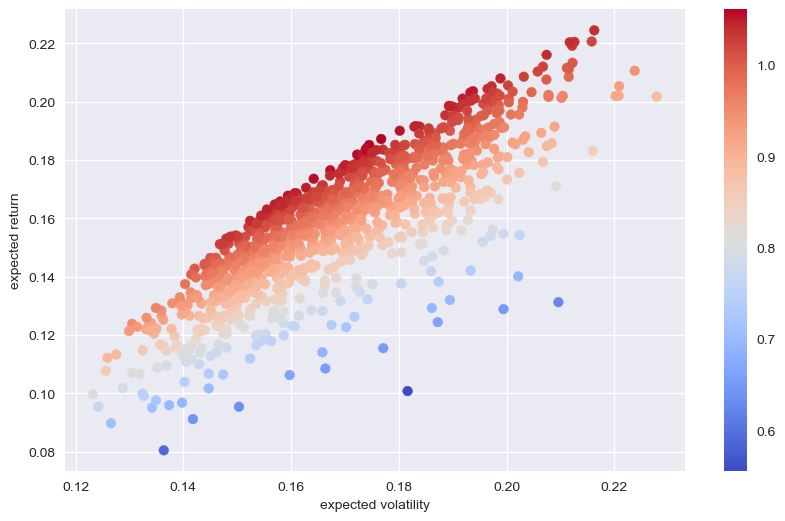

In [45]:
plt.figure(figsize=(10, 6))
fig = plt.scatter(pvr[:, 0], pvr[:, 1],
                  c=psr, cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label='Sharpe ratio'
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [46]:
bnds = len(symbols) * [(0, 1),]

In [47]:
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [48]:
cons = {'type': 'eq',
        'fun': lambda weights: weights.sum() - 1}
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(weights)>}

In [49]:
opt_weights = {}

In [58]:
len(symbols) * [1 / len(symbols)]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [55]:
rets_ = rets[symbols].loc['2010-01-01':'2010-12-31']
minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']

array([ 0.366,  0.000,  0.000,  0.056,  0.578])

In [56]:
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow

In [57]:
opt_weights

{2010: array([ 0.366,  0.000,  0.000,  0.056,  0.578]),
 2011: array([ 0.543,  0.000,  0.077,  0.000,  0.380]),
 2012: array([ 0.324,  0.000,  0.000,  0.471,  0.205]),
 2013: array([ 0.012,  0.305,  0.219,  0.464,  0.000]),
 2014: array([ 0.452,  0.115,  0.419,  0.000,  0.015]),
 2015: array([ 0.000,  0.000,  0.000,  1.000,  0.000]),
 2016: array([ 0.150,  0.260,  0.000,  0.058,  0.533]),
 2017: array([ 0.231,  0.203,  0.031,  0.109,  0.426]),
 2018: array([ 0.000,  0.295,  0.000,  0.705,  0.000])}

In [61]:
port_volatility(rets[symbols].loc['2010-01-01':'2010-12-31'], opt_weights[2010])

0.15744010466954175

In [62]:
res = pd.DataFrame()
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    epv = port_volatility(rets_, opt_weights[year])
    epr = port_return(rets_, opt_weights[year])
    esr = epr / epv
    rets_ = rets[symbols].loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
    rpv = port_volatility(rets_,opt_weights[year])
    rpr = port_return(rets_, opt_weights[year])
    rsr = rpr / rpv
    res = res.append(pd.DataFrame({
        'epv': epv, 'epr': epr, 'esr': esr, 'rpv': rpv, 'rpr': rpr, 'rsr': rsr
    }, index=[year + 1]))

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_16492/2452279169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_16492/2452279169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_16492/2452279169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_16492/2452279169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({


In [63]:
res

,epv,epr,esr,rpv,rpr,rsr
2011,0.157440,0.303003,1.924564,0.160622,0.133836,0.833235
2012,0.173279,0.169321,0.977156,0.182292,0.161375,0.885256
2013,0.202460,0.278459,1.375378,0.168714,0.166897,0.989228
2014,0.181544,0.368961,2.032353,0.197798,0.026830,0.135645
2015,0.160340,0.309486,1.930190,0.211368,-0.024560,-0.116194
2016,0.326730,0.778330,2.382179,0.296565,0.103870,0.350242
2017,0.106148,0.090933,0.856663,0.079521,0.230630,2.900235
2018,0.086548,0.260702,3.012226,0.157337,0.038234,0.243004
2019,0.323796,0.228008,0.704174,0.207672,0.275819,1.328147


In [64]:
res.mean()

epv    0.190920
epr    0.309689
esr    1.688320
rpv    0.184654
rpr    0.123659
rsr    0.838755
dtype: float64

In [65]:
res[['epv', 'rpv']].corr()

,epv,rpv
epv,1.000000,0.765733
rpv,0.765733,1.000000


<Axes: >

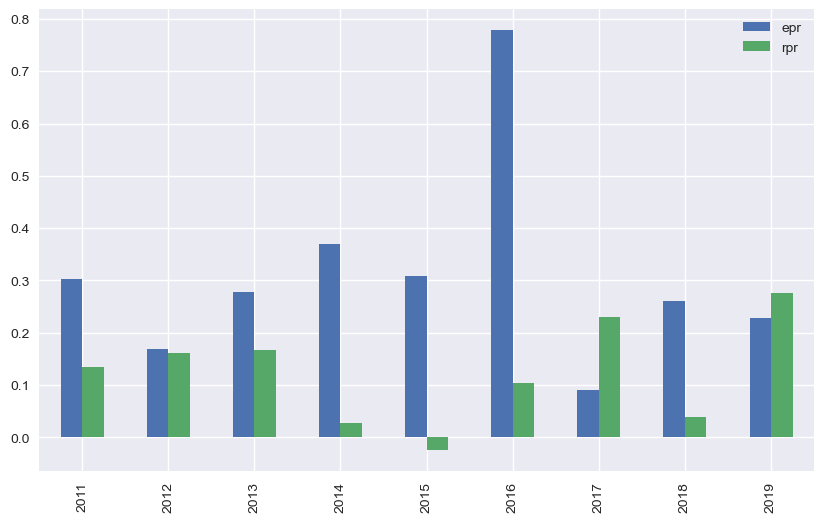

In [69]:
res[['epv', 'rpv']].plot(kind='bar', figsize=(10, 6))

In [67]:
res[['esr', 'rsr']].corr()

,esr,rsr
esr,1.000000,-0.698607
rsr,-0.698607,1.000000


<Axes: >

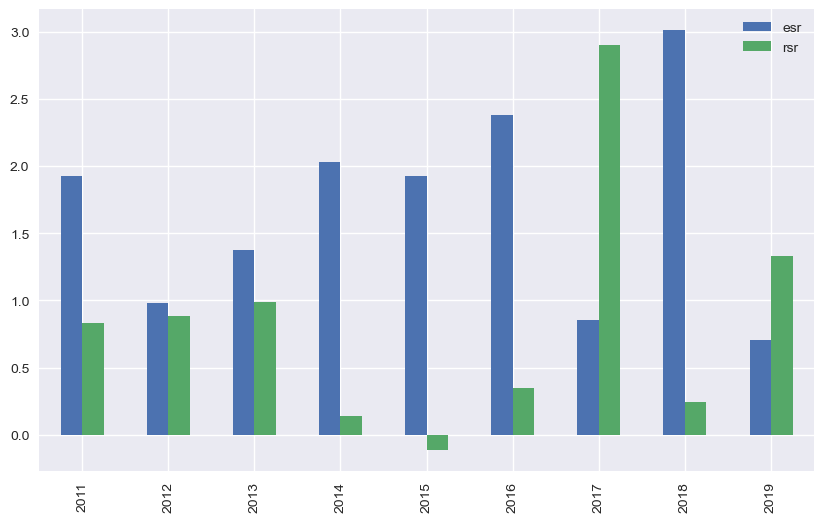

In [68]:
res[['esr', 'rsr']].plot(kind='bar', figsize=(10, 6))